In [192]:
# Librerías
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import expon, betaprime, invgamma, lognorm, pareto, gamma
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from typing import Union
import scipy.stats as stats
import tqdm
import inspect
import warnings
warnings.filterwarnings('ignore')

# Analisis Exploratorio de datos

In [193]:
#Definimos la ruta de nuestra base de datos
ruta_archivo_csv = '../bases de datos/df.csv'

# Carga los datos desde el archivo CSV en un DataFrame
datos = pd.read_csv(ruta_archivo_csv, sep=',')
display(datos.info())
datos.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   cust_id                           8950 non-null   object 
 2   activated_date                    8937 non-null   object 
 3   last_payment_date                 8941 non-null   object 
 4   balance                           8948 non-null   float64
 5   balance_frequency                 8950 non-null   float64
 6   purchases                         8950 non-null   float64
 7   oneoff_purchases                  8950 non-null   float64
 8   installments_purchases            8950 non-null   float64
 9   cash_advance                      8838 non-null   float64
 10  purchases_frequency               8950 non-null   float64
 11  oneoff_purchases_frequency        8950 non-null   float64
 12  purcha

None

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,...,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,...,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,...,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0


In [194]:
datos.tail()

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
8945,8946,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,8947,C19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6,0
8947,8948,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,8949,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,8950,C19190,2020-07-31,2020-10-14,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,...,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


# Limpiamos los datos, es decir, quitamos los datos faltantes

In [195]:
# Verificar si hay datos faltantes
datos_faltantes = datos.isnull().sum()

# Mostrar la cantidad de datos faltantes por columna
print(datos_faltantes)

Unnamed: 0                            0
cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64


In [196]:
datos_sin_faltantes = datos.dropna()

# Mostrar información del DataFrame después de eliminar los datos faltantes
print(datos_sin_faltantes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8497 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8497 non-null   int64  
 1   cust_id                           8497 non-null   object 
 2   activated_date                    8497 non-null   object 
 3   last_payment_date                 8497 non-null   object 
 4   balance                           8497 non-null   float64
 5   balance_frequency                 8497 non-null   float64
 6   purchases                         8497 non-null   float64
 7   oneoff_purchases                  8497 non-null   float64
 8   installments_purchases            8497 non-null   float64
 9   cash_advance                      8497 non-null   float64
 10  purchases_frequency               8497 non-null   float64
 11  oneoff_purchases_frequency        8497 non-null   float64
 12  purchases_i

In [197]:
# Reseteamos el índice del DataFrame
datos_sin_faltantes = datos_sin_faltantes.reset_index(drop=True)

# Mostrar información del DataFrame después de eliminar los datos faltantes y resetear el índice
print(datos_sin_faltantes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8497 entries, 0 to 8496
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8497 non-null   int64  
 1   cust_id                           8497 non-null   object 
 2   activated_date                    8497 non-null   object 
 3   last_payment_date                 8497 non-null   object 
 4   balance                           8497 non-null   float64
 5   balance_frequency                 8497 non-null   float64
 6   purchases                         8497 non-null   float64
 7   oneoff_purchases                  8497 non-null   float64
 8   installments_purchases            8497 non-null   float64
 9   cash_advance                      8497 non-null   float64
 10  purchases_frequency               8497 non-null   float64
 11  oneoff_purchases_frequency        8497 non-null   float64
 12  purcha

In [198]:
#Vemos si hay clientes repetidos
frecuencia = datos_sin_faltantes['cust_id'].value_counts()
print(frecuencia)

cust_id
C10001    1
C16114    1
C16129    1
C16128    1
C16127    1
         ..
C13078    1
C13077    1
C13076    1
C13074    1
C19190    1
Name: count, Length: 8497, dtype: int64


In [199]:
frecuencia.shape
#como el numero de frecuencia es igual al numero de registro entonces concluimos que no hay clientes repetidos

(8497,)

# Vemos que no haya datos capturados erroneamente, como valores negativos

In [200]:
# Verificar si hay valores negativos en la columna 'columna_datos'
hay_negativos = (datos_sin_faltantes['balance'] < 0).any()

# Imprimir el resultado
if hay_negativos:
    print("La columna contiene valores negativos.")
else:
    print("La columna no contiene valores negativos.")   

La columna no contiene valores negativos.


In [201]:
saldos=datos_sin_faltantes['balance']
# Verificar si hay valores NaN
hay_nan = np.isnan(saldos)
print("¿Hay valores NaN en los datos?", any(hay_nan))

# Verificar si hay valores infinitos
hay_inf = np.isinf(saldos)
print("¿Hay valores infinitos en los datos?", any(hay_inf))

¿Hay valores NaN en los datos? False
¿Hay valores infinitos en los datos? False


# Vemos el saldo máximo y el saldo mínimo que hay en las tarjetas.

In [202]:
saldo_max = max(saldos)
saldo_min =min(saldos)
print('El saldo maximo es: ' + str(saldo_max) + ' y el saldo minimo es: ' + str(saldo_min))

El saldo maximo es: 19043.13856 y el saldo minimo es: 0.0


# Creamos el histograma de saldos

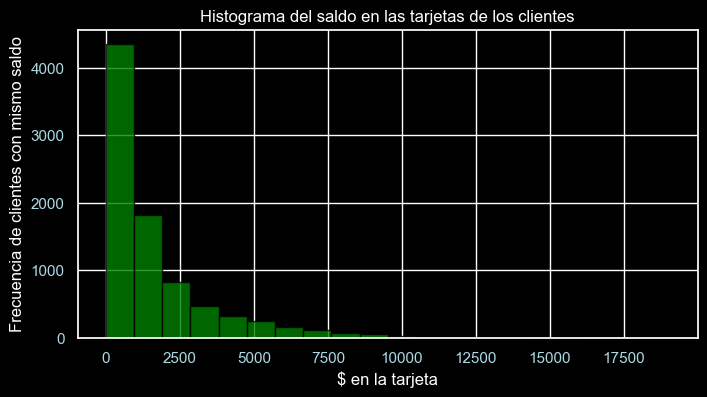

In [203]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 4))

# Establecer el estilo de Seaborn con fondo oscuro
sns.set(style='darkgrid')

# Trazar el histograma
plt.hist(saldos, bins=20, alpha=0.8, color='green', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('$ en la tarjeta', color='white')
plt.ylabel('Frecuencia de clientes con mismo saldo', color='white')
plt.title('Histograma del saldo en las tarjetas de los clientes', color='white')

# Configurar el color de fondo de la figura y fuera la figura como negro
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

# Cambiar el color de los números en los ejes x e y a azul claro
plt.gca().tick_params(axis='x', colors='lightblue')
plt.gca().tick_params(axis='y', colors='lightblue')

# Mostrar el histograma
plt.show()

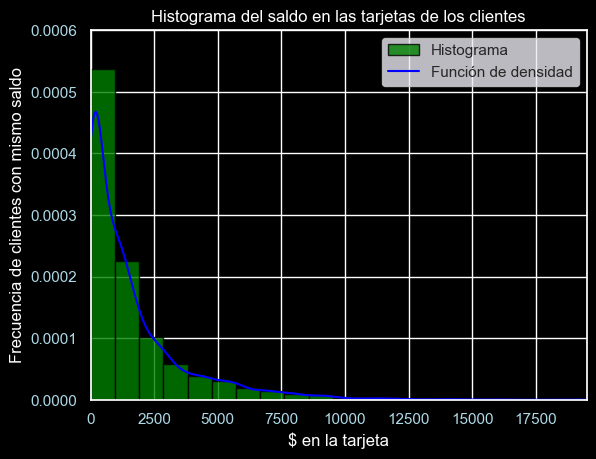

In [204]:
#Creamos otro histograma de densidad de probabilidad
saldos.hist(density=True, bins=20, alpha=0.8, color='green', label='Histograma', edgecolor='black')

# Crear el gráfico de densidad
saldos.plot(kind='kde',color='blue', label='Función de densidad')

# Establecer los límites del eje y, y del eje x
plt.ylim(0, 0.0006)
plt.xlim(0, 19500)


# Agregar etiquetas y título
plt.xlabel('$ en la tarjeta', color='white')
plt.ylabel('Frecuencia de clientes con mismo saldo', color='white')
plt.title('Histograma del saldo en las tarjetas de los clientes', color='white')
plt.legend()

# Configurar el color de fondo de la figura y fuera la figura como negro
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

# Cambiar el color de los números en los ejes x e y a azul claro
plt.gca().tick_params(axis='x', colors='lightblue')
plt.gca().tick_params(axis='y', colors='lightblue')

# Mostrar el gráfico
plt.show()


# Añadir título y etiquetas
#plt.title('Distribución de saldo')
#plt.xlabel('Saldo')
#plt.ylabel('Frecuencia')
#plt.legend()

# Mostrar el gráfico
#plt.show()

Notamos como la distribución del saldo en la tarjeta es asimetrica hacia la derecha, además los saldos son siempre mayores o iguales que 0, por loq ue podriamos calcular cual de las distribuciones con ese dominio se asemeja más a nuestro histograma.

Las funciones de distribución que tienen dominio en el intervalo
∞
)
[0,∞) son conocidas como distribuciones de probabilidad positivas o distribuciones de probabilidad semi-infinitas. Estas distribuciones son útiles trabajamosbajando con variables aleatorias que solo pueden tomar valores no negativos, como duraciones, cantidades o tamaños.

Algunas de las distribuciones de probabilidad más comunes con do[
0
,
∞
)
[01.- ,∞) incluyen:

Distribución exponencial: Modela el tiempo entre eventos en un proc2.- eso de Poisson.

Distribución gamma: Generaliza la distribución exponencial y puede modelar el tiempo hasta el k-ésimo evento en un pr3.- oceso de Poisson.

Distribución Weibull: Utilizada para modelar tiempos de vida o duraciones, y es una generalización de la distri4.- bución exponencial.

Distribución de Pareto: Utilizada para modelar distribuciones de riqueza, tamaños de archivos, i5.- ngresos, entre otros.

Distribución chi-cuadrado: Utilizada en pruebas de hipótesis y en la construcción de i6.- ntervalos de confianza.

Distribución beta: Utilizada para modelar propo7.- rciones y probabilidades.

Distribución log-normal: Utilizada para modelar variables que son el logaritmo de una vari

Aunque podriamos enfocarnos unicamente en la distribución de pareto que mejor se ajusta a nuestro histograma, sin embargo, evaluaremos cual de estas distribuciones es la que mejor se asemeja a nuestros datos.able normalmente distribuida.

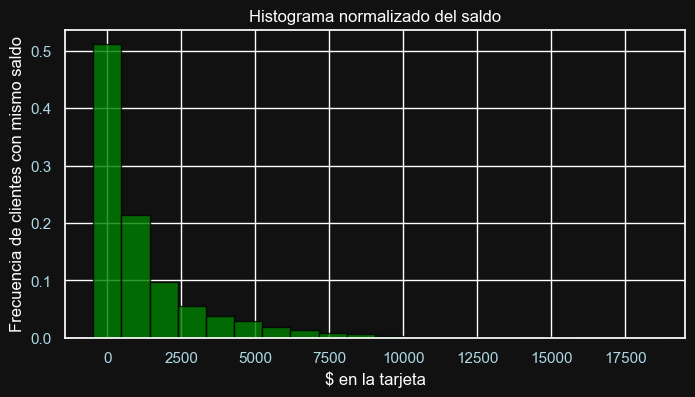

In [177]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 4))

# Crear el histograma con bins de tamaño 20 y suma de alturas igual a 1 para obtener la densidad de probabilidad
conteos, bordes = np.histogram(saldos, bins=20, range=(0, saldo_max), density=True)

# Calcular el ancho de cada bin
ancho_bin = bordes[1] - bordes[0]

# Guardar los datos normalizados en una lista
alturas_normalizadas = conteos * ancho_bin

# Trazar el histograma
plt.bar(bordes[:-1], alturas_normalizadas, width=ancho_bin, alpha=0.8, color='green', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('$ en la tarjeta', color='white')
plt.ylabel('Frecuencia de clientes con mismo saldo', color='white')
plt.title('Histograma normalizado del saldo', color='white')

# Configurar el color de fondo de la figura y fuera la figura como negro
plt.gca().set_facecolor('#111111')
plt.gcf().set_facecolor('#111111')

# Cambiar el color de los números en los ejes x e y a azul claro
plt.gca().tick_params(axis='x', colors='lightblue')
plt.gca().tick_params(axis='y', colors='lightblue')

# Mostrar el histograma
plt.show()

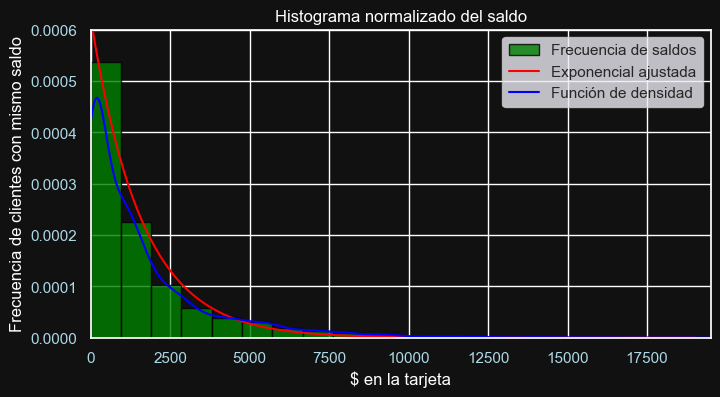

In [182]:
# Eliminar valores no finitos
#datos_limpios = saldos[np.isfinite(saldos)]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 4))


# Crear histograma
plt.hist(saldos, bins=20, density=True, alpha=0.8, color='green', edgecolor='black', label='Frecuencia de saldos')

# Ajustar distribución exponencial
parametros = expon.fit(saldos)
x = np.linspace(0, 19044, 1000)
pdf = expon.pdf(x, *parametros)

# Graficar distribución exponencial ajustada
plt.plot(x, pdf, color='red', linestyle='-', label='Exponencial ajustada')

saldos.plot(kind='kde',color='blue', label='Función de densidad')

# Establecer los límites del eje y, y del eje x
plt.ylim(0, 0.0006)
plt.xlim(0, 19500)

# Agregar etiquetas y título
plt.xlabel('$ en la tarjeta', color='white')
plt.ylabel('Frecuencia de clientes con mismo saldo', color='white')
plt.title('Histograma normalizado del saldo', color='white')
plt.legend()

# Configurar el color de fondo de la figura y fuera la figura como negro
plt.gca().set_facecolor('#111111')
plt.gcf().set_facecolor('#111111')

# Cambiar el color de los números en los ejes x e y a azul claro
plt.gca().tick_params(axis='x', colors='lightblue')
plt.gca().tick_params(axis='y', colors='lightblue')

plt.show()

La distribución parece asemejarce a la frecuencia de los saldos, vemos otra distribución como la beta prime.

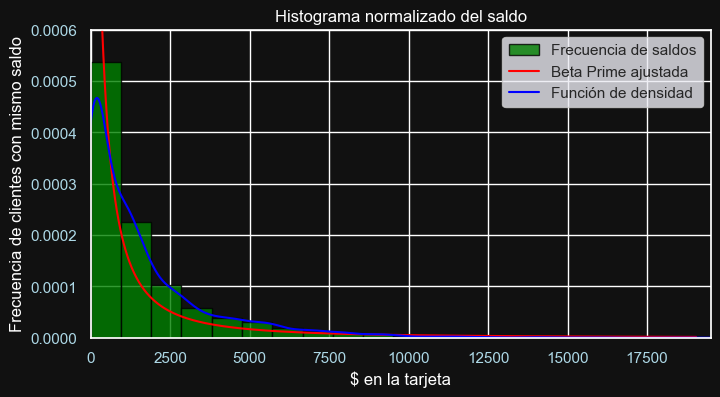

In [183]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 4))


# Crear histograma
plt.hist(saldos, bins=20, density=True, alpha=0.8, color='green', edgecolor='black', label='Frecuencia de saldos')

# Ajustar distribución beta prime
parametros = betaprime.fit(saldos)
x = np.linspace(0, 19044, 1000)
pdf = betaprime.pdf(x, *parametros)

# Graficar distribución beta prime ajustada
plt.plot(x, pdf, color='red', linestyle='-', label='Beta Prime ajustada')

saldos.plot(kind='kde',color='blue', label='Función de densidad')

# Establecer los límites del eje y, y del eje x
plt.ylim(0, 0.0006)
plt.xlim(0, 19500)

# Agregar etiquetas y título
plt.xlabel('$ en la tarjeta', color='white')
plt.ylabel('Frecuencia de clientes con mismo saldo', color='white')
plt.title('Histograma normalizado del saldo', color='white')
plt.legend()

# Configurar el color de fondo de la figura y fuera la figura como negro
plt.gca().set_facecolor('#111111')
plt.gcf().set_facecolor('#111111')

# Cambiar el color de los números en los ejes x e y a azul claro
plt.gca().tick_params(axis='x', colors='lightblue')
plt.gca().tick_params(axis='y', colors='lightblue')

plt.show()

También tiene un comportamiento similar, sin embargo para saber cual se ajusta más a nuestros datos usaremos el criterio AIC y BIC
para las distribuciones mencionadas anteriormente y que nos interezan como: 
1.- Distribución exponencial. 
2.- Distribución gamma.
3.- Distribución Weibull.
4.- Distribución de Pareto.
5.- Distribución chi-cuadrado.
6.- Distribución beta.
7.- Distribución log-normal.

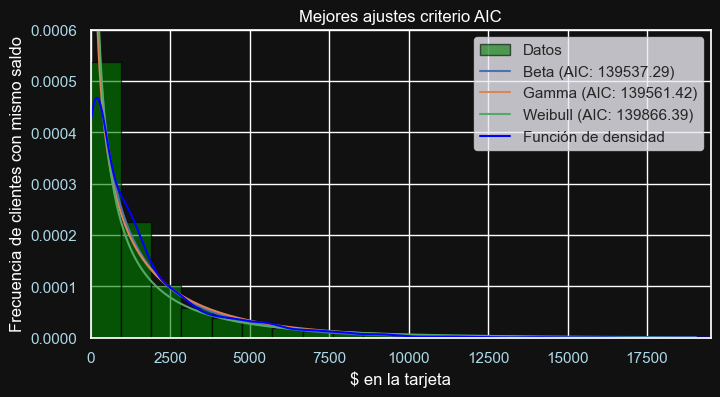

In [185]:
from scipy.stats import expon, gamma, weibull_min, pareto, chi2, beta, lognorm

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 4))

# Crear histograma de los datos
plt.hist(saldos, bins=20, density=True, alpha=0.6, color='green', edgecolor='black', label='Datos')

# Ajustar distribuciones y calcular AIC y BIC
distribuciones = {'Exponencial': expon, 'Gamma': gamma, 'Weibull': weibull_min, 'Pareto': pareto, 'Chi-cuadrado': chi2, 'Beta': beta, 'Log-Normal': lognorm}
resultados = []
for nombre, distribucion in distribuciones.items():
    parametros = distribucion.fit(saldos)
    k = len(parametros)
    ll = distribucion.logpdf(saldos, *parametros)
    aic = -2 * np.sum(ll) + 2 * k
    bic = -2 * np.sum(ll) + k * np.log(len(saldos))
    resultados.append({'Distribución': nombre, 'AIC': aic, 'BIC': bic, 'Parametros': parametros})

# Seleccionar las tres mejores distribuciones según AIC y BIC
resultados_ordenados_por_aic = sorted(resultados, key=lambda x: x['AIC'])
resultados_ordenados_por_bic = sorted(resultados, key=lambda x: x['BIC'])

# Graficar las tres mejores distribuciones según AIC
for resultado in resultados_ordenados_por_aic[:3]:
    distribucion = distribuciones[resultado['Distribución']]
    parametros = resultado['Parametros']
    x = np.linspace(0, 19043, 1000)
    pdf = distribucion.pdf(x, *parametros)
    plt.plot(x, pdf, label=f'{resultado["Distribución"]} (AIC: {resultado["AIC"]:.2f})')


saldos.plot(kind='kde',color='blue', label='Función de densidad')
# Establecer los límites del eje y, y del eje x
plt.ylim(0, 0.0006)
plt.xlim(0, 19500)

# Agregar etiquetas y título
plt.xlabel('$ en la tarjeta', color='white')
plt.ylabel('Frecuencia de clientes con mismo saldo', color='white')
plt.title('Mejores ajustes criterio AIC', color='white')
plt.legend()

# Configurar el color de fondo de la figura y fuera la figura como negro
plt.gca().set_facecolor('#111111')
plt.gcf().set_facecolor('#111111')

# Cambiar el color de los números en los ejes x e y a azul claro
plt.gca().tick_params(axis='x', colors='lightblue')
plt.gca().tick_params(axis='y', colors='lightblue')

plt.show()

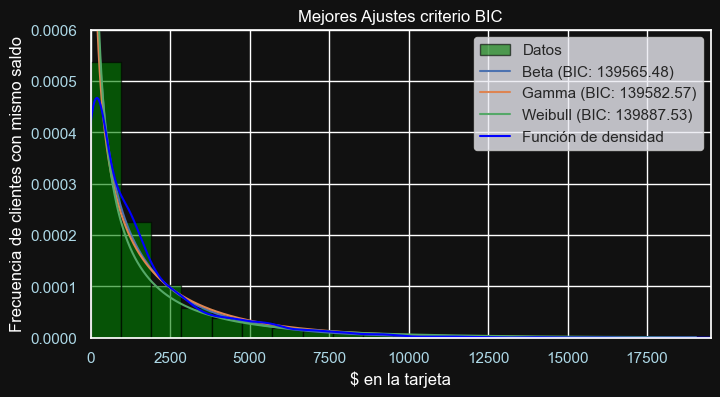

In [186]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 4))
# Graficar las tres mejores distribuciones según BIC
plt.hist(saldos, bins=20, density=True, alpha=0.6, color='green', edgecolor='black', label='Datos')
for resultado in resultados_ordenados_por_bic[:3]:
    distribucion = distribuciones[resultado['Distribución']]
    parametros = resultado['Parametros']
    x = np.linspace(0, 19043, 1000)
    pdf = distribucion.pdf(x, *parametros)
    plt.plot(x, pdf, label=f'{resultado["Distribución"]} (BIC: {resultado["BIC"]:.2f})')

saldos.plot(kind='kde',color='blue', label='Función de densidad')
# Establecer los límites del eje y, y del eje x
plt.ylim(0, 0.0006)
plt.xlim(0, 19500)

# Agregar etiquetas y título
plt.xlabel('$ en la tarjeta', color='white')
plt.ylabel('Frecuencia de clientes con mismo saldo', color='white')
plt.title('Mejores Ajustes criterio BIC', color='white')
plt.legend()

# Configurar el color de fondo de la figura y fuera la figura como negro
plt.gca().set_facecolor('#111111')
plt.gcf().set_facecolor('#111111')

# Cambiar el color de los números en los ejes x e y a azul claro
plt.gca().tick_params(axis='x', colors='lightblue')
plt.gca().tick_params(axis='y', colors='lightblue')

plt.show()

Concluimos que la distribución que más se ajusta a nuestros datos es la beta. Sin embargo se puede ajustar a más funciones de distribución de forma automática como se muestra a continuación.

In [12]:
datos_sin_faltantes['balance'].value_counts(0)

balance
0.000000       6
40.900749      1
237.198442     1
2583.247881    1
757.470201     1
              ..
523.329585     1
2135.406047    1
212.080181     1
1820.216623    1
372.708075     1
Name: count, Length: 8492, dtype: int64

In [13]:
df = datos_sin_faltantes.query('balance != 0')

In [14]:
df.head()

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
4,6,C10006,2019-10-06,2020-07-27,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,...,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8491 entries, 0 to 8496
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8491 non-null   int64  
 1   cust_id                           8491 non-null   object 
 2   activated_date                    8491 non-null   object 
 3   last_payment_date                 8491 non-null   object 
 4   balance                           8491 non-null   float64
 5   balance_frequency                 8491 non-null   float64
 6   purchases                         8491 non-null   float64
 7   oneoff_purchases                  8491 non-null   float64
 8   installments_purchases            8491 non-null   float64
 9   cash_advance                      8491 non-null   float64
 10  purchases_frequency               8491 non-null   float64
 11  oneoff_purchases_frequency        8491 non-null   float64
 12  purchases_i

In [16]:
# Resetear el índice del DataFrame
df = df.reset_index(drop=True)

# Mostrar información del DataFrame después de eliminar los datos faltantes y resetear el índice
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8491 entries, 0 to 8490
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8491 non-null   int64  
 1   cust_id                           8491 non-null   object 
 2   activated_date                    8491 non-null   object 
 3   last_payment_date                 8491 non-null   object 
 4   balance                           8491 non-null   float64
 5   balance_frequency                 8491 non-null   float64
 6   purchases                         8491 non-null   float64
 7   oneoff_purchases                  8491 non-null   float64
 8   installments_purchases            8491 non-null   float64
 9   cash_advance                      8491 non-null   float64
 10  purchases_frequency               8491 non-null   float64
 11  oneoff_purchases_frequency        8491 non-null   float64
 12  purcha

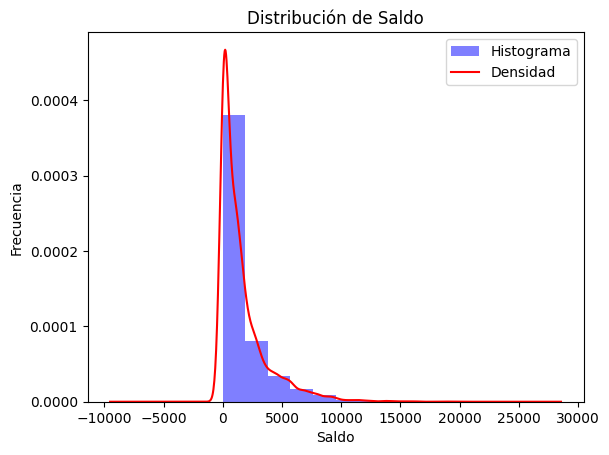

In [46]:
df['balance'].hist(density=True, bins=10, alpha=0.5, color='blue', label='Histograma')

# Crear el gráfico de densidad
df['balance'].plot(kind='kde', color='red', label='Densidad')

# Añadir título y etiquetas
plt.title('Distribución de Saldo')
plt.xlabel('Saldo')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

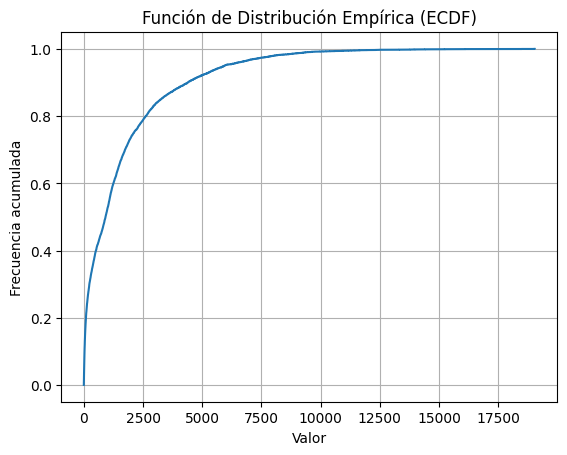

In [18]:
# Ordena los datos de forma ascendente
datos_ordenados = np.sort(df['balance'])

# Calcula las frecuencias relativas acumuladas np.arange(inicio, fin, salto)
n = len(datos_ordenados)
frecuencias_acumuladas = np.arange(1, n + 1) / n

# Grafica la ECDF con plt.step de matplotlib
plt.step(datos_ordenados, frecuencias_acumuladas, where='post')

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia acumulada')
plt.title('Función de Distribución Empírica (ECDF)')

# Muestra la gráfica
plt.grid(True)
plt.show()

In [19]:
frecuencias_acumuladas.shape

(8491,)

In [134]:
# Ajustar modelos de distribución de probabilidad
resultados = []

# Ajustar modelo beta
params_beta = stats.beta.fit(saldos)
a, b, loc, scale = params_beta
aicc_beta = 2 * len(params_beta) - 2 * stats.beta.logpdf(saldos, a, b, loc, scale).sum()

resultados.append(('beta', aicc_beta))

# Ajustar modelo exponencial
params_expon = stats.expon.fit(saldos)
loc, scale = params_expon
aicc_expon = 2 * len(params_expon) - 2 * stats.expon.logpdf(saldos, loc, scale).sum()

resultados.append(('exponencial', aicc_expon))

# Continuar ajustando otros modelos...
# Ajustar modelo betaprime
params_betaprime = stats.betaprime.fit(saldos)
a, b, loc, scale = params_betaprime
aicc_betaprime = 2 * len(params_betaprime) - 2 * stats.betaprime.logpdf(saldos, a, b, loc, scale).sum()

resultados.append(('betaprime', aicc_betaprime))

# Ajustar modelo invgamma
params_invgamma = stats.invgamma.fit(saldos)
a, loc, scale = params_invgamma
aicc_invgamma = 2 * len(params_invgamma) - 2 * stats.invgamma.logpdf(saldos, a, loc, scale).sum()

resultados.append(('invgamma', aicc_invgamma))

# Convertir resultados a DataFrame para ordenar y visualizar
resultados_df = pd.DataFrame(resultados, columns=['distribucion', 'AIC'])

# Ordenar resultados por AIC
resultados_ordenados = resultados_df.sort_values(by='AIC')

# Imprimir resultados ordenados, el valor ma´s bajo de AIC es la distribución que mejor ajusta a mis datos
print(resultados_ordenados)

  distribucion            AIC
0         beta  139537.288226
2    betaprime  141977.346875
1  exponencial  142395.667113
3     invgamma  143330.969007


In [151]:
def seleccionar_distribuciones(familia='realall', verbose=True):
    '''
    Esta función selecciona un subconjunto de las distribuciones disponibles
    en scipy.stats
    
    Parameters
    ----------
    familia : {'realall', 'realline', 'realplus', 'real0to1', 'discreta'}
        realall: distribuciones de la familia `realline` + `realplus`
        realline: distribuciones continuas en el dominio (-inf, +inf)
        realplus: distribuciones continuas en el dominio [0, +inf)
        real0to1: distribuciones continuas en el dominio [0,1]
        discreta: distribuciones discretas
        
    verbose : bool
        Si se muestra información de las distribuciones seleccionadas
        (the default `True`).
        
    Returns
    -------
    distribuciones: list
        listado con las distribuciones (los objetos) seleccionados.
        
    Raises
    ------
    Exception
        Si `familia` es distinto de 'realall', 'realline', 'realplus', 'real0to1',
        o 'discreta'.
        
    Notes
    -----
        Las distribuciones levy_stable y vonmises han sido excluidas por el momento.
        y studentized_range porque tarda demasiado en este ejemplo de saldos

    '''
    
    distribuciones = [getattr(stats,d) for d in dir(stats) \
                     if isinstance(getattr(stats,d), (stats.rv_continuous, stats.rv_discrete))]
    
    exclusiones = ['levy_stable', 'vonmises', 'studentized_range']
    distribuciones = [dist for dist in distribuciones if dist.name not in exclusiones]
            
    dominios = {
        'realall' : [-np.inf, np.inf],
        'realline': [np.inf,np.inf],
        'realplus': [0, np.inf],
        'real0to1': [0, 1], 
        'discreta': [None, None],
    }

    distribucion = []
    tipo = []
    dominio_inf = []
    dominio_sup = []

    for dist in distribuciones:
        distribucion.append(dist.name)
        tipo.append(np.where(isinstance(dist, stats.rv_continuous), 'continua', 'discreta'))
        dominio_inf.append(dist.a)
        dominio_sup.append(dist.b)
    
    info_distribuciones = pd.DataFrame({
                            'distribucion': distribucion,
                            'tipo': tipo,
                            'dominio_inf': dominio_inf,
                            'dominio_sup': dominio_sup
                          })

    info_distribuciones = info_distribuciones \
                          .sort_values(by=['dominio_inf', 'dominio_sup'])\
                          .reset_index(drop=True)
    
    if familia in ['realall', 'realline', 'realplus', 'real0to1']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='continua']
        condicion = (info_distribuciones['dominio_inf'] == dominios[familia][0]) & \
                    (info_distribuciones['dominio_sup'] == dominios[familia][1]) 
        info_distribuciones = info_distribuciones[condicion].reset_index(drop=True)
        
    if familia in ['discreta']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='discreta']
        
    seleccion = [dist for dist in distribuciones \
                 if dist.name in info_distribuciones['distribucion'].values]
    
    
    if verbose:
        print("---------------------------------------------------")
        print("       Distribuciones seleccionadas                ")
        print("---------------------------------------------------")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
            print(info_distribuciones)
    
    return seleccion


def comparar_distribuciones(x, familia='realall', ordenar='aic', verbose=True):
    '''
    Esta función selecciona y ajusta un subconjunto de las distribuciones 
    disponibles en scipy.stats. Para cada distribución calcula los valores de
    Log Likelihood, AIC y BIC.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    familia : {'realall', 'realline', 'realplus', 'real0to1', 'discreta'}
        realall: distribuciones de la familia `realline` + `realplus`
        realline: distribuciones continuas en el dominio (-inf, +inf)
        realplus: distribuciones continuas en el dominio [0, +inf)
        real0to1: distribuciones continuas en el dominio [0,1]
        discreta: distribuciones discretas
    
    ordenar : {'aic', 'bic'}
        criterio de ordenación de mejor a peor ajuste.
    
    verbose : bool
        Si se muestra información de las distribuciones seleccionadas
        (the default `True`).
        
    Returns
    -------
    resultados: data.frame
        distribucion: nombre de la distribución.
        log_likelihood: logaritmo del likelihood del ajuste.
        aic: métrica AIC.
        bic: métrica BIC.
        n_parametros: número de parámetros de la distribución de la distribución.
        parametros: parámetros del tras el ajuste
        
    Raises
    ------
    Exception
        Si `familia` es distinto de 'realall', 'realline', 'realplus', 'real0to1',
        o 'discreta'.
        
    Notes
    -----

    '''
    
    distribuciones = seleccionar_distribuciones(familia=familia, verbose=verbose)
    distribucion_ = []
    log_likelihood_= []
    aic_ = []
    bic_ = []
    n_parametros_ = []
    parametros_ = []
    
    for i, distribucion in enumerate(distribuciones):
        
        print(f"{i+1}/{len(distribuciones)} Ajustando distribución: {distribucion.name}")
        
        try:
            parametros = distribucion.fit(data=x)
            nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                                 if not p=='x'] + ["loc","scale"]
            parametros_dict = dict(zip(nombre_parametros, parametros))
            log_likelihood = distribucion.logpdf(x, *parametros).sum()
            aic = -2 * log_likelihood + 2 * len(parametros)
            bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)
            
            distribucion_.append(distribucion.name)
            log_likelihood_.append(log_likelihood)
            aic_.append(aic)
            bic_.append(bic)
            n_parametros_.append(len(parametros))
            parametros_.append(parametros_dict)
            
            resultados = pd.DataFrame({
                            'distribucion': distribucion_,
                            'log_likelihood': log_likelihood_,
                            'aic': aic_,
                            'bic': bic_,
                            'n_parametros': n_parametros_,
                            'parametros': parametros_,
                
                         })
            
            resultados = resultados.sort_values(by=ordenar).reset_index(drop=True)
            
        except Exception as e:
            print(f"Error al tratar de ajustar la distribución {distribucion.name}")
            print(e)
            print("")
            
    return resultados                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [152]:
# Ajuste y comparación de distribuciones
# ==============================================================================
resultados = comparar_distribuciones(
                x=saldos.to_numpy(),
                familia='realplus',
                ordenar='aic',
                verbose=False
            )
resultados

1/49 Ajustando distribución: alpha
2/49 Ajustando distribución: betaprime
3/49 Ajustando distribución: burr
4/49 Ajustando distribución: burr12
5/49 Ajustando distribución: chi
6/49 Ajustando distribución: chi2
7/49 Ajustando distribución: erlang
8/49 Ajustando distribución: expon
9/49 Ajustando distribución: exponpow
10/49 Ajustando distribución: exponweib
11/49 Ajustando distribución: f
12/49 Ajustando distribución: fatiguelife
13/49 Ajustando distribución: fisk
14/49 Ajustando distribución: foldcauchy
15/49 Ajustando distribución: foldnorm
16/49 Ajustando distribución: gamma
17/49 Ajustando distribución: genexpon
18/49 Ajustando distribución: gengamma
19/49 Ajustando distribución: genhalflogistic
20/49 Ajustando distribución: geninvgauss
21/49 Ajustando distribución: genpareto
22/49 Ajustando distribución: gibrat
23/49 Ajustando distribución: gompertz
24/49 Ajustando distribución: halfcauchy
25/49 Ajustando distribución: halfgennorm
26/49 Ajustando distribución: halflogistic
27/49 A

,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,ncx2,-69742.175738,139492.351476,139520.541350,4,"{'df': 1.0631476056966087, 'nc': 0.69032478269..."
1,exponpow,-69759.292212,139524.584424,139545.726829,3,"{'b': 0.4988233841251694, 'loc': -4.7852269590..."
2,gamma,-69777.712052,139561.424103,139582.566509,3,"{'a': 0.5343500214057821, 'loc': -4.0054356134..."
3,geninvgauss,-69848.907339,139705.814678,139734.004552,4,"{'p': 0.4743870973464338, 'b': 0.0346585532349..."
4,recipinvgauss,-69851.673069,139709.346137,139730.488542,3,"{'mu': 33.61162230646558, 'loc': -0.4037415731..."
5,exponweib,-69869.508457,139747.016914,139775.206787,4,"{'a': 1.0661213864851269, 'c': 0.6495405309002..."
6,erlang,-69908.269340,139822.538680,139843.681085,3,"{'a': 0.5945898587311016, 'loc': -2.6967104486..."
7,weibull_min,-69930.196099,139866.392199,139887.534604,3,"{'c': 0.5929489015084228, 'loc': -4.0306968522..."
8,gengamma,-69956.031547,139920.063095,139948.252969,4,"{'a': 0.4885482380756618, 'c': 1.1551860383645..."
9,nakagami,-69982.472909,139970.945819,139992.088224,3,"{'nu': 0.21906580660613056, 'loc': -6.11012041..."


In [153]:
def plot_distribucion(x, nombre_distribucion, ax=None):
    '''
    Esta función superpone la curva de densidad de una distribución con el
    histograma de los datos.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    nombre_distribuciones : str
        nombre de una de las distribuciones disponibles en `scipy.stats`.
        
    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado
        
    Raises
    ------
        
    Notes
    -----
    '''

    distribucion = getattr(stats, nombre_distribucion)

    parametros = distribucion.fit(data=x)

    nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                         if not p=='x'] + ["loc","scale"]
    parametros_dict = dict(zip(nombre_parametros, parametros))

    log_likelihood = distribucion.logpdf(x, *parametros).sum()

    aic = -2 * log_likelihood + 2 * len(parametros)
    bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

    x_hat = np.linspace(min(x), max(x), num=100)
    y_hat = distribucion.pdf(x_hat, *parametros)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5);
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribución')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();

    print('---------------------')
    print('Resultados del ajuste')
    print('---------------------')
    print(f"Distribución:   {distribucion.name}")
    print(f"Dominio:        {[distribucion.a, distribucion.b]}")
    print(f"Parámetros:     {parametros_dict}")
    print(f"Log likelihood: {log_likelihood}")
    print(f"AIC:            {aic}")
    print(f"BIC:            {bic}")
    
    return ax


def plot_multiple_distribuciones(x, nombre_distribuciones, ax=None):
    '''
    Esta función superpone las curvas de densidad de varias distribuciones
    con el histograma de los datos.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    nombre_distribuciones : list
        lista con nombres de distribuciones disponibles en `scipy.stats`.
        
    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado
        
    Raises
    ------
        
    Notes
    -----
    '''
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5)
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribuciones')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    
    for nombre in nombre_distribuciones:
        
        distribucion = getattr(stats, nombre)

        parametros = distribucion.fit(data=x)

        nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                             if not p=='x'] + ["loc","scale"]
        parametros_dict = dict(zip(nombre_parametros, parametros))

        log_likelihood = distribucion.logpdf(x, *parametros).sum()

        aic = -2 * log_likelihood + 2 * len(parametros)
        bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

        x_hat = np.linspace(min(x), max(x), num=100)
        y_hat = distribucion.pdf(x_hat, *parametros)
        ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    
    ax.legend();
    
    return ax

---------------------
Resultados del ajuste
---------------------
Distribución:   invgauss
Dominio:        [0.0, inf]
Parámetros:     {'mu': 3.6514100519375168, 'loc': -86.32519983334953, 'scale': 462.34533696570884}
Log likelihood: -71119.25179877543
AIC:            142244.50359755085
BIC:            142265.64600286787


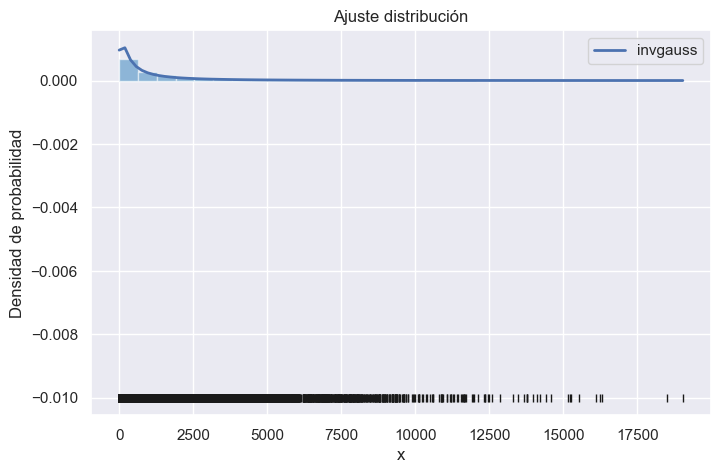

In [158]:
fig, ax = plt.subplots(figsize=(8,5))

plot_distribucion(
    x=saldos.to_numpy(),
    nombre_distribucion=resultados['distribucion'][15],
    ax=ax
);

TypeError: list indices must be integers or slices, not str

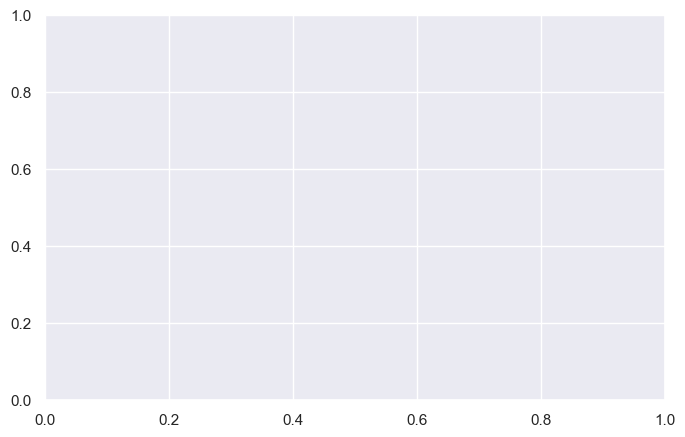

In [205]:
#Las curvas de densidad de probabilidad para las top 5 distribuciones.
fig, ax = plt.subplots(figsize=(8,5))

plot_multiple_distribuciones(
    x=saldos.to_numpy(),
    nombre_distribuciones=resultados['distribucion'][:5],
    ax=ax
);

Por lo tanto la distribución que mas se ajusta es la ncx2.

In [191]:

# Convertir la columna de fechas de activación al formato de fecha
datos_sin_faltantes['activated_date'] = pd.to_datetime(datos_sin_faltantes['activated_date'], format='%Y-%m-%d')

# Extraer el año y el mes de la fecha de activación
datos_sin_faltantes['anio'] = datos_sin_faltantes['activated_date'].dt.year
datos_sin_faltantes['mes'] = datos_sin_faltantes['activated_date'].dt.month

# Agrupar los datos por año y mes y calcular el saldo medio y mediano
informe = datos_sin_faltantes.groupby(['anio', 'mes']).agg({'balance': ['mean', 'median']})

# Renombrar las columnas
informe.columns = ['saldo_medio', 'saldo_mediano']

# Mostrar el informe
print(informe).

          saldo_medio  saldo_mediano
anio mes                            
2019 10   2548.794248    1545.598011
     11   1890.539524    1107.961644
     12   2051.316984    1193.351573
2020 1    1864.259536    1180.961924
     2    1784.641287    1018.880453
     3    1590.094278     894.357857
     4    1540.150147     969.583332
     5    1249.460309     779.431874
     6     971.212562     518.894713
     7     664.835110     251.144969
